<a href="https://colab.research.google.com/github/thegrouch4413/Predictive-Analysis/blob/main/Copy_of_Housing_Prices_(group).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

This example uses housing price data from King County, WA that includes Seattle.

Linear regression is perhaps the simplest of all models. Given a set a set of input values and expected values, a linear equation of this form can fit that data:

$$y = a_1 x + a_0$$

In this case, x represents the living area of a particular house, and y represents it's sale price. The goal of linear regression is to compute the slope $a_1$ and y-intercept $a_0$ that minimizes error.

This could be considered a kind of learning, where a machine is learning the values for $a_1$ and $a_0$ given a set of training data. Once trained, the model can be used to predict the value of a house in King County given the amount of living area.

# Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Get The Data

In [7]:
!wget https://raw.githubusercontent.com/msiddalingaiah/MachineLearning/master/Regression/data/kc_house_data.csv -O kc_house_data.csv

--2022-03-24 00:42:49--  https://raw.githubusercontent.com/msiddalingaiah/MachineLearning/master/Regression/data/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   2.40M  --.-KB/s    in 0.07s   

2022-03-24 00:42:50 (34.5 MB/s) - ‘kc_house_data.csv’ saved [2515206/2515206]



In [8]:
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# EDA

In [9]:
data.info

<bound method DataFrame.info of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   

In [10]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
data.isnull().values.any() # use to find ANY null values in data #

False

In [13]:
space = data['sqft_above']
price = data['price']

In [14]:
# Change X into 2D array   
X = np.array(space).reshape(-1, 1) #turn from vertical to horizontal#
Y = np.array(price)

In [15]:
X

array([[1180],
       [2170],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [16]:
Y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

# Visualizing Data

In [17]:
# Split data into train sets and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

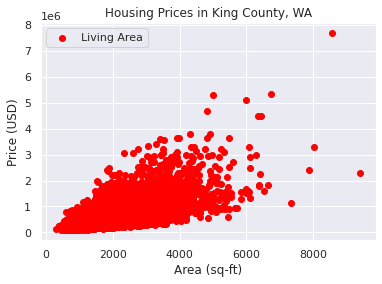

In [18]:
plt.scatter(X_train,Y_train,color="red",label="Living Area")
plt.title("Housing Prices in King County, WA")
plt.xlabel("Area (sq-ft)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Training the Model

In [19]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

# Visualize the Training Set

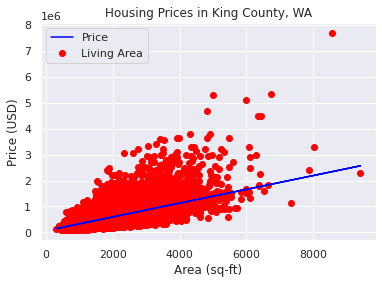

In [20]:
# Visualize training set
plt.scatter(X_train,Y_train,color="red",label="Living Area")
plt.title("Housing Prices in King County, WA")
plt.plot(X_train,regressor.predict(X_train),color="blue",label="Price")
plt.xlabel("Area (sq-ft)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [21]:
y_pred = regressor.predict(X_test)

In [27]:
area = 1000

price = regressor.predict([[area]])

print('House of %d sq-ft costs about $%d' % (area, price))

House of 1000 sq-ft costs about $331497
